In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
# this is the file you should've gotten from your repo
from utils import extract_dates, get_val_scores
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
df = pd.read_csv('../data/ks2.csv', encoding='utf-8', parse_dates=['deadline', 'launched'])
df = extract_dates(df)

In [10]:
mod1 = xgb.XGBClassifier()
pipe = make_pipeline(OrdinalEncoder(), mod1)
X = df.drop(['deadline', 'launched', 'state'], axis=1)
y = df['state']
df['duration'] = (df['deadline'] - df['launched']).dt.days

In [7]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [52]:
kfold = StratifiedKFold(n_splits=20)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1985, stratify=y, test_size=0.2)

In [56]:
mod1 = xgb.XGBClassifier()
pipe = make_pipeline(OrdinalEncoder(), mod1)

In [57]:
scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=kfold)

In [23]:
scores

array([0.68954348, 0.68593312, 0.69008334, 0.68949926, 0.68585504,
       0.68636118, 0.6851127 , 0.69108517, 0.68821703, 0.68706978])

In [25]:
mod1.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [27]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['name', 'category', 'main_category',
                                      'currency', 'country'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'name',
                                          'data_type': dtype('O'),
                                          'mapping': The Songs of Adelaide & Abullah                                                 1
Greeting From Earth: ZGAC Arts Capsule For ET                                   2
Where is Hank?                                                                  3
ToshiCapital Rekordz Needs H...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
 

In [28]:
# predictive accuracy
pipe.score(X, y)

0.685947513051553

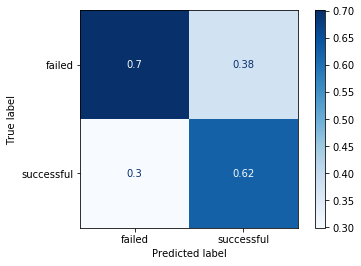

In [30]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

plot_confusion_matrix(pipe, X, y,
                                 cmap=plt.cm.Blues,
                                 normalize='pred');

In [31]:
y

0         failed
1         failed
2         failed
3         failed
4         failed
           ...  
370449    failed
370450    failed
370451    failed
370452    failed
370453    failed
Name: state, Length: 370454, dtype: object

In [34]:
pipe.predict(X)

array(['failed', 'failed', 'failed', ..., 'failed', 'failed',
       'successful'], dtype=object)

In [36]:
pipe[1].get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [38]:
pipe.predict_proba(X)[:, 1]

array([0.38612738, 0.21454135, 0.15800619, ..., 0.39907536, 0.24214925,
       0.5901037 ], dtype=float32)

In [40]:
np.where(y == 'successful', 1, 0) - pipe.predict_proba(X)[:, 1]

array([-0.38612738, -0.21454135, -0.15800619, ..., -0.39907536,
       -0.24214925, -0.59010369])

In [41]:
y.value_counts()

failed        236498
successful    133956
Name: state, dtype: int64

In [42]:
pipe[1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [48]:
pipe.steps[1][1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [49]:
pipe[1].set_params(tree_method='gpu_hist')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)